# Análisis de vulnerabilidad del criptosistema RSA frente al algoritmo cuántico de Peter Shor

In [1]:
from tinyrsa import RSA,TextEncrypter,TextDecrypter,RSAEncrypter,RSADecrypter
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from test import crack
from quantum.runners import eval_circuit,get_results
from fractions import Fraction
from tools import modular_inverse
from math import gcd

In [2]:
sys = RSA(2000)
keys = sys.keys

time: 0:00:11.826408


In [3]:
cipher = TextEncrypter(keys.public)
keys.public

(65537,
 8799292395458872745376059549473952076987090281068926289378334090533068945258086965222861223690705811599039772771874018790919213012792666375567390610359089487365926576964202581514613259299303456617806477943401068706502445374018149070631935190927267326141867137036192878155902315782189592745309994421667788898884592460607505805556988367645504365135623202425981900488150088956494965579359970720125776429809808362127148713252140787201762310541209636243288969798279181801576422220309372202419541508114817685058661187453935872637963705010884189433504698664348360240549964453865819334788049012474834143230628879663621717047837243566875558803240762292697835714538970521750912251106115411263241538991547179927793506618930318432782266416745408769204111267744366837187454559414904052989582126046353852345007476591891393706096489297293174940221886612704603264633882205842000284481073747027783408810655086151272706783219489082173493242541090835966113870055027082222931213781318329242704398536466196685356

In [4]:
msg = "hi, this is a message ciphered with an rsa-key of 2000 bits"
cmsg = cipher.encrypt(msg)
cmsg

'5Ndh\x1a@\xa0SÈ\x945I\x10\'¼\x8dl\x19\x14\x81F·åîOJ÷x9FPd©f¦hi\x19P\x02÷êºPSÜ\x9eıì\x17:=á¿&Âpñ}\x02%º«jV\x0c\x8fu½#\x91ÊÍ\x1e\x0f\x12I¼\x8a¹^\x03Pø*û¦\'.ÇäC¦o\x0céM¦X\x89)\x8aCOı.1ş\tQ\t\x1a\x94\x1f\x8c\x91eJY¹sğ\x1d\x90\x86}¶m÷ºE\x16\x977ÈÂ4C²q\x16G44\x92ş¹Å\x11°\x10\x8f5SV95\x8c¹\x93»\x99n%pL|\x8bkVíá\x9c#\x83g\x1f¼*FÄ\x15Êà\x9a\x16\x08/\x88\x02)Ær6}\x19aZ®\x1aP\x85\x9clI\x0fwTÒ¥\x1aà\x06tZ\x86\x0f;ş/\x89¸Åü¸\x13®eG"L\x82t\x82\x97ï\x18\x9evb\x8aTğ8ît\x8faóåbîÜp5\x7f\x8f\x0bÏ\x12ÔÅ7\x07¹2<@ø¨~\x08YuuQÙÊĞ$\x1b\x06\x9f\x02\x1aä\x0eÌÎÕøİí?\x1aæå[\x1aô(\x9fÊ\x98dóº¶½.¥!Ç?\x13[Ë\xad§D×5cJ»à\x96\x131\x1a;3\nO\xa0×Æ¢PÄ+H»)}6\t;!Àİ\x8bµıDMK(ù`£\x99X\'ei\x85\x1aÜ\x1d\x8aï·\x93\x13¢²j\x890m5\n\x15\x02wl\x9aÁ7\x9cè\xad·Aî\x81Ì\x87GÎ|\x87`\x91p.\x14LT\x00Ö\x12±ÿ\x14âÌ¼¤®ÿ{äm3ã\x9dE\x8eÎ{TH\x1d\x92¹TA\x85@©IWÊ¹|\x9bìËV¥^°/9f\x9a¬û8ûß\x85\x96æ°\x17Ô-\x15Xº\x1a|¶ä©e\x15ã,¥\x05)-\x85ëè\x0c\x89b¥áºi\x8eß|-'

In [5]:
dcipher = TextDecrypter(keys.private)
m = dcipher.decrypt(cmsg)
m

'hi, this is a message ciphered with an rsa-key of 2000 bits'

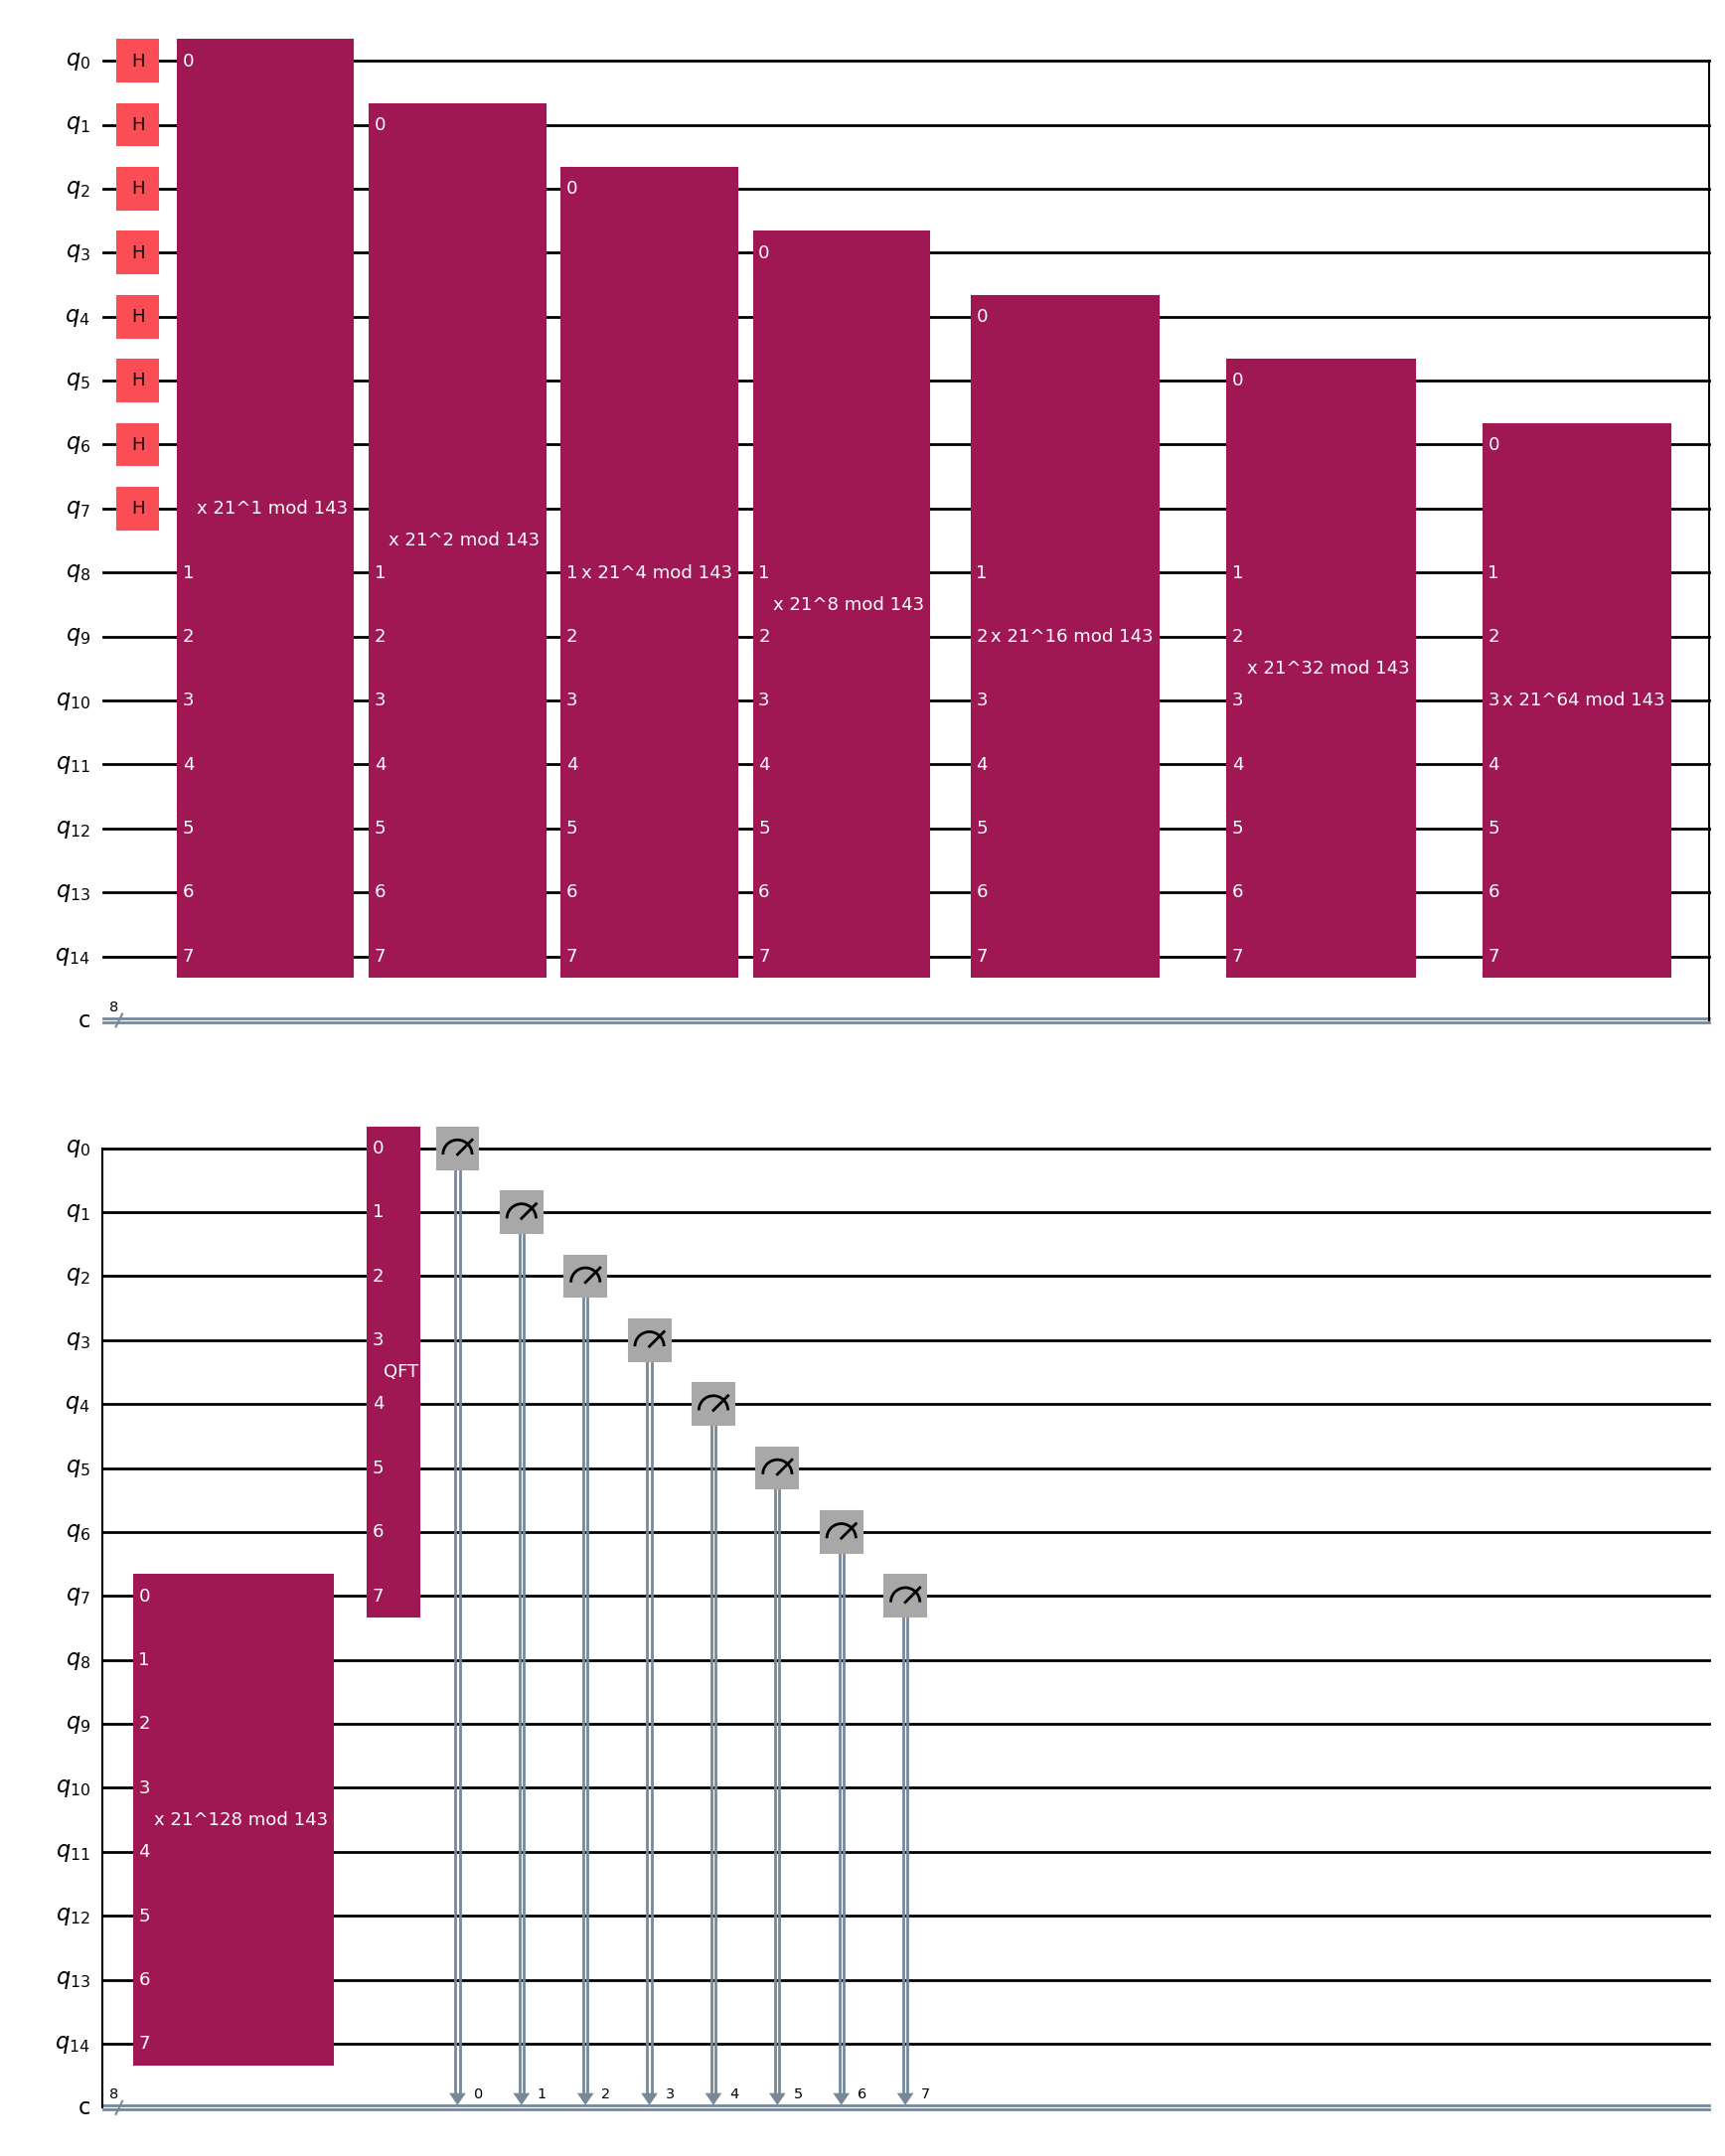

In [6]:
qc = QuantumCircuit(15,8).compose(crack(),range(15))
qc.measure(range(8),range(8))
qc.draw('mpl')

time: 0:00:12.018027


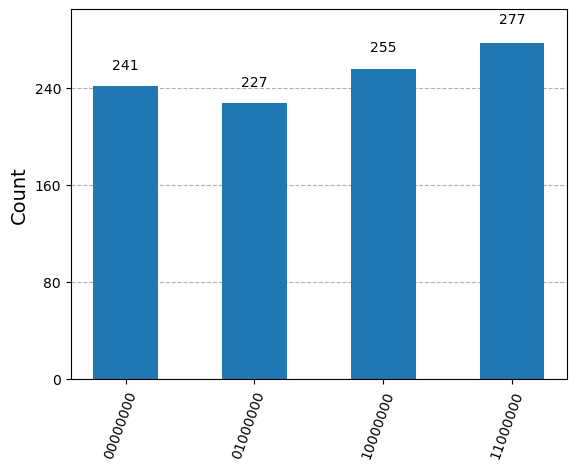

In [7]:
results = eval_circuit(qc)
plot_histogram(results)

In [8]:
values = get_results(**results)
values

time: 0:00:00.000091


[('10000000', 128, '255 times'),
 ('01000000', 64, '227 times'),
 ('00000000', 0, '241 times'),
 ('11000000', 192, '277 times')]

In [9]:
def check_period(period:int):
    x = 1
    while True:
        if 21**x % 143 == 21**(x + period) % 143 and 21**x % 143 == 1:
            return True
        if 21**x % 143 != 21**(x + period) % 143:
            return False
        x += 1
        pass
    pass

In [10]:
def get_factors(val:int):
    factor = 1
    offset = -3
    option = Fraction(val,143).denominator
    while not check_period(option*factor) and factor < 4:
       factor += 1
       pass
    if factor < 4 and option * factor % 2 == 0:
        return gcd((21 ** (option * factor >> 1) - 1),143) , gcd((21 ** (option * factor >> 1) + 1),143)
    while offset < 4:
        factor = 1
        while not check_period((option + offset)*factor) and factor < 4:
            factor += 1
            pass
        if factor < 4 and ((option + offset) * factor) % 2 == 0:
            return gcd((21 ** ((option + offset) * factor >> 1) - 1),143) , gcd((21 ** ((option + offset) * factor >> 1) + 1),143)
        offset += 1
        pass
    return None

In [11]:
sys = RSA(4)
keys = sys.keys
keys.public

time: 0:00:00.000766


(65537, 143)

In [12]:
p1,p2 = get_factors(192)
p1,p2

(11, 13)

In [13]:
private = modular_inverse(keys.public[0],(p1 - 1)*(p2 - 1)),keys.public[1]
private

(113, 143)

In [14]:
cipher = RSAEncrypter(keys.public)
msg = 125
cmsg = cipher.encrypt(msg)
cmsg

60

In [15]:
dcipher = RSADecrypter(private)
m = dcipher.decrypt(cmsg)
m

125

In [ ]:
from quantum import constant_modular_exponentiation

mod_exp = constant_modular_exponentiation(5,7,4)
mod_exp.draw('mpl').show()